In [1]:
from __future__ import print_function
import datetime
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt, finance
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn.hmm import GaussianHMM
import math

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
ticker = "gold"
start_date = datetime.date(2010, 1, 1)
#end_date = datetime.date.today()
end_date = datetime.date.today() - datetime.timedelta(days=15)


data = pd.read_csv('data2.csv', header=0)
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,open,close,low,high,volume,Adj Close
0,2007-03-19,1000.0,947.80,940.00,1105.0,63128585.34,1000.00
1,2007-03-20,957.8,942.39,940.05,957.8,24674935.10,947.80
2,2007-03-21,948.0,945.67,944.10,948.5,12035364.29,942.39
3,2007-03-22,950.0,950.15,946.00,951.9,9859948.45,945.67
4,2007-03-23,950.0,947.18,945.00,951.0,13198594.08,950.15


In [3]:
df.reset_index(inplace=True,drop=False)
df.drop(['index','open','low','high','Adj Close'],axis=1,inplace=True)
df.head()

,date,close,volume
0,2007-03-19,947.80,63128585.34
1,2007-03-20,942.39,24674935.10
2,2007-03-21,945.67,12035364.29
3,2007-03-22,950.15,9859948.45
4,2007-03-23,947.18,13198594.08


In [4]:
df['date'] = df['date'].apply(datetime.datetime.toordinal)
df.head()

,date,close,volume
0,732754,947.80,63128585.34
1,732755,942.39,24674935.10
2,732756,945.67,12035364.29
3,732757,950.15,9859948.45
4,732758,947.18,13198594.08


In [5]:
df = list(df.itertuples(index=False, name=None))
dates = np.array([q[0] for q in df], dtype=int)
close_v = np.array([q[1] for q in df])
volume = np.array([q[2] for q in df])[1:]

In [6]:
diff = np.diff(close_v)
diff[:10]

array([-5.41,  3.28,  4.48, -2.97, -6.47,  2.94,  3.25,  0.15, -2.23, -4.44])

In [7]:
dates = dates[1:]
dates[:10]

array([732755, 732756, 732757, 732758, 732761, 732763, 732764, 732765,
       732711, 732739])

In [8]:
close_v = close_v[1:]
close_v.shape

(2338,)

In [9]:
X = np.column_stack([diff, volume])

In [10]:
X[:10]

array([[ -5.41000000e+00,   2.46749351e+07],
       [  3.28000000e+00,   1.20353643e+07],
       [  4.48000000e+00,   9.85994845e+06],
       [ -2.97000000e+00,   1.31985941e+07],
       [ -6.47000000e+00,   6.03949520e+06],
       [  2.94000000e+00,   4.43333641e+06],
       [  3.25000000e+00,   3.48799696e+06],
       [  1.50000000e-01,   2.61966938e+06],
       [ -2.23000000e+00,   1.83976186e+06],
       [ -4.44000000e+00,   1.70835469e+07]])

In [14]:
print("fitting to HMM and decoding ...", end="")
# Make an HMM instance and execute fit
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000).fit(X)
# Predict the optimal sequence of internal hidden state

hidden_states = model.predict(X)
print("done")

print("Transition matrix - probability of going to any particular state")
print(model.transmat_)
print(model.predict_proba)

print("Means and vars of each hidden state")
params = pd.DataFrame(columns=('State', 'Means', 'Variance'))
for i in range(model.n_components):
    params.loc[i] = [format(i), model.means_[i],np.diag(model.covars_[i])]

fitting to HMM and decoding ...done
Transition matrix - probability of going to any particular state
[[ 0.940686    0.00210694  0.05720706]
 [ 0.01742891  0.86191997  0.12065112]
 [ 0.07360962  0.02642467  0.89996571]]
<bound method _BaseHMM.predict_proba of GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)>
Means and vars of each hidden state


e:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
e:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
e:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
e:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7

In [15]:
params.head()

,State,Means,Variance
0,0,"[-0.422304080184, 27087384.9722]","[218.00060355, 2.23948556714e+14]"
1,1,"[3.63192812207, 448150525.259]","[2626.37581295, 3.31173447931e+17]"
2,2,"[1.71874528748, 85244382.8554]","[412.453927294, 1.55483555955e+15]"


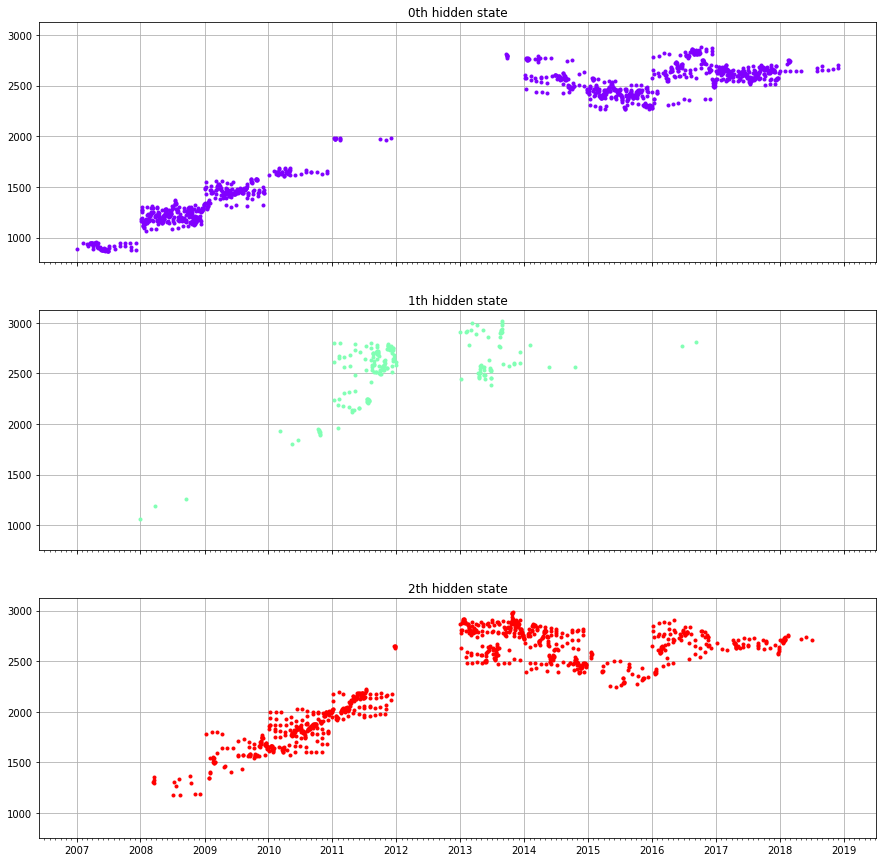

In [16]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()

    Returns        Volume
0 -0.291279  3.130153e+07
1  3.330440  3.970268e+08
2  1.611699  9.055314e+07


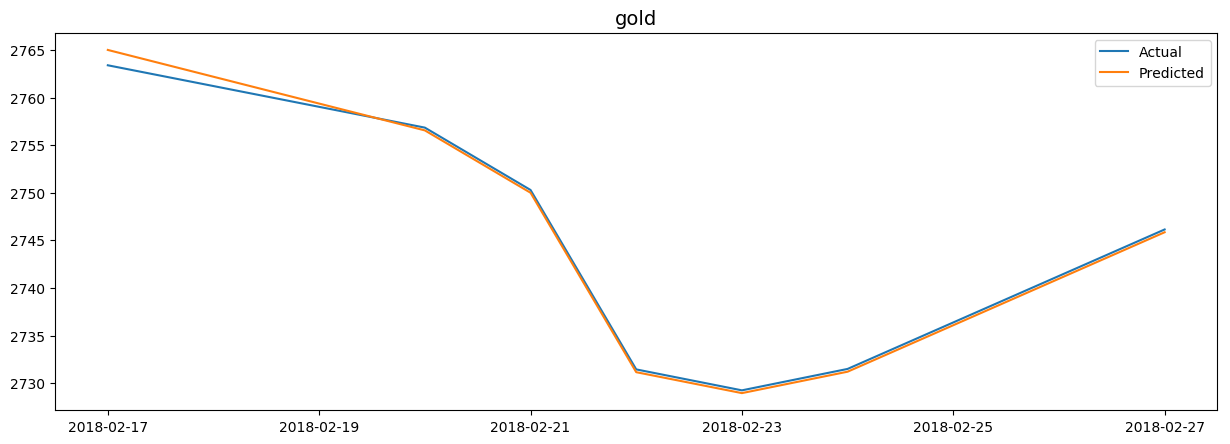

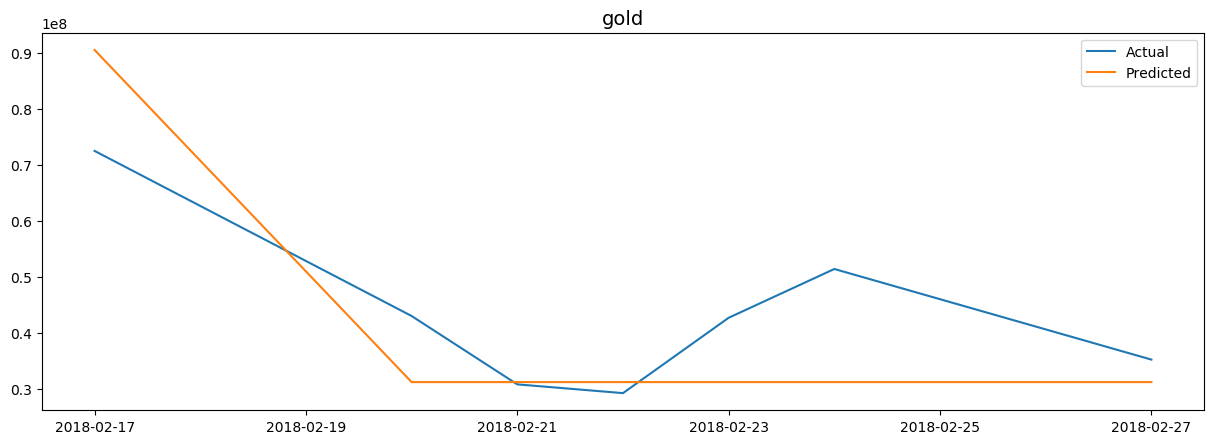

In [19]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) #even beyond N days
end_date = datetime.date.today() 

dates = np.array([q[0] for q in df], dtype=int)

predicted_prices = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_price = df[-lastN+idx][1]
    volume = df[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,close_v[-lastN:])
plt.plot(predicted_dates,predicted_prices)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()
